# 章節 8：觀察者偏誤（Observer Bias）

## 8.9 練習

習題 8.1：

一些不穩定的粒子從源頭發射並且隨著距離 x 衰變，實數 x 服從一個帶有參數 λ 的冪次分佈。衰變的事件只有當他們發生在 x=1 到 x=20 的窗口中才能被觀察到。N 個被觀察到的衰變在下列位置 {1.5, 2, 3, 4, 5, 12}，請問 λ 的後驗分佈？

你可以在此下載作者個解答程式碼：http://thinkbayes.com/decay.py

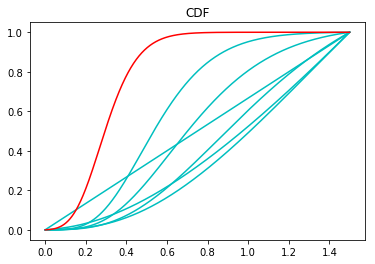

後驗分佈位置的期望值： 0.30845402884627243


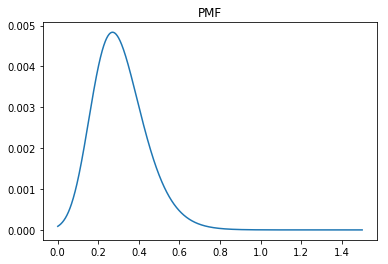

In [68]:

# exponential : p(D|H) ~ lambda*exp(-lambda*x) , x: 幾公分
# P(H)  lambda probability , 平均幾公分
# P(D) 資料機率

import thinkbayes as tb
import math
import matplotlib.pyplot as plt
import numpy as np

def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

class Particle(tb.Suite):
    
    def Likelihood(self, data, hypo):
        return self.EvalExponential(hypo, data)
    
    def EvalExponential(self, lam, x, low=1.0, high=20.0):
        
        # 因為知道 x 確定為 1~20 公分，所以可以知道 low <= x <= high 的累績機率
        # P(low <= x <= high) = P(x <= high) - P(x <= low) = (1-e^-lam*high) - (1-e^-lam*low) = e^-lam*low - e^-lam*high
        factor = exp(-low * lam) - exp(-high * lam)
        return lam*math.exp(-lam*x)/factor

    
dist = Particle(np.linspace(0.001, 1.5, 1001))

data = [1.5, 2, 3, 4, 5, 12]

for d in data:
    plot_dist(dist.MakeCdf(), c='c')
    dist.Update(d)
    

plot_dist(dist.MakeCdf(), c='r') 
plt.title("CDF")
plt.show()
print("後驗分佈位置的期望值：", dist.Mean())

plt.title("PMF")
plot_dist(dist)
plt.show()